# **Proyecto Final - Machine Learning**
García Rodríguez Fernanda

García Trujillo Diana

Pérez Rivera Iris Alina

Rosales Miranda Karol Paola

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
df = pd.read_excel('PCOS_data_1.xlsx')

# Información general del dataset
print("Información general del dataset")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas\n")

Información general del dataset
Dimensiones: 541 filas x 42 columnas



### **Análisis Exploratorio y Descriptivo**

In [2]:
# Primeras 5 filas del dataset para revisar que sí se haya importado correctamente
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
# Valores faltantes
print("Análisis de valores faltantes")
missing = df.isnull().sum()
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje': missing_percent.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print(missing_df.to_string(index=False))
print(f"\nTotal de columnas con valores faltantes: {len(missing_df)}")

Análisis de valores faltantes
              Columna  Valores Faltantes  Porcentaje
Marraige Status (Yrs)                  1    0.184843
           AMH(ng/mL)                  1    0.184843
      Fast food (Y/N)                  1    0.184843

Total de columnas con valores faltantes: 3


In [4]:
# Estadística descriptiva del dataset
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [5]:
# Valores duplicados
print("Valores duplicados")
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Valores duplicados
Número de filas duplicadas: 0


In [6]:
# Distribución de variable objetivo
print("Distribución de variable objetivo (PCOS Y/N)")
target_col = 'PCOS (Y/N)'
print(df[target_col].value_counts())

Distribución de variable objetivo (PCOS Y/N)
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


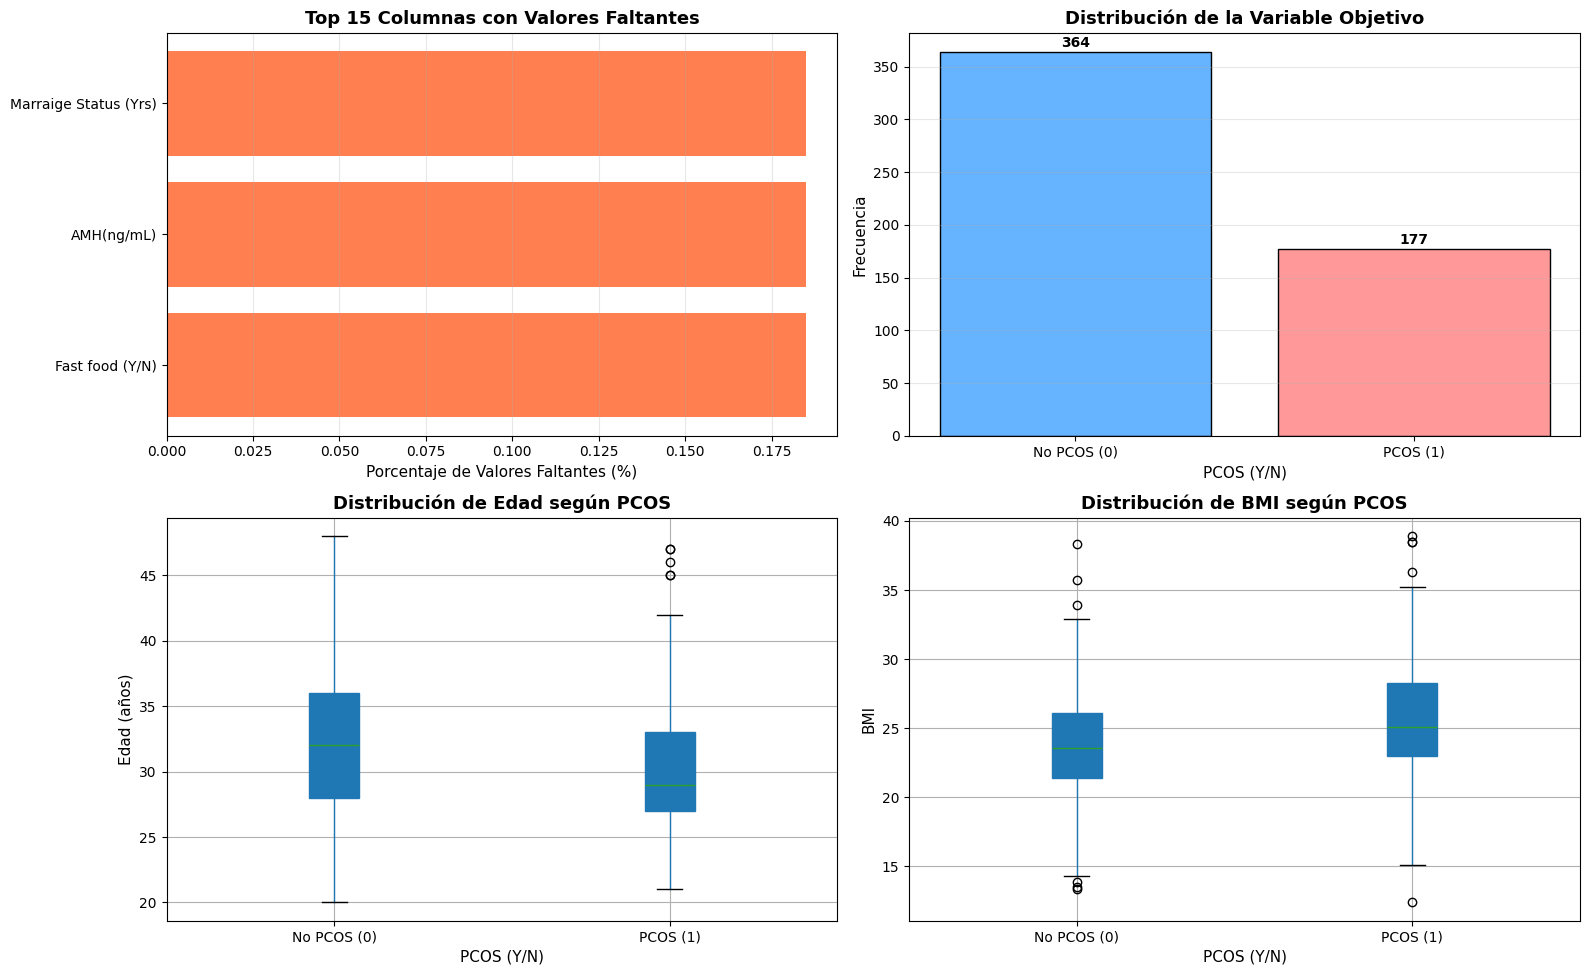

In [7]:
# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Valores faltantes por columna
if len(missing_df) > 0:
    ax1 = axes[0, 0]
    missing_df_plot = missing_df.head(15)  # Top 15
    ax1.barh(missing_df_plot['Columna'], missing_df_plot['Porcentaje'], color='coral')
    ax1.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=11)
    ax1.set_title('Top 15 Columnas con Valores Faltantes', fontsize=13, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No hay valores faltantes', ha='center', va='center', fontsize=14)
    axes[0, 0].axis('off')

# Distribución de la variable objetivo
ax2 = axes[0, 1]
target_counts = df[target_col].value_counts()
colors_target = ['#66b3ff', '#ff9999']
ax2.bar(target_counts.index, target_counts.values, color=colors_target, edgecolor='black')
ax2.set_xlabel('PCOS (Y/N)', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de la Variable Objetivo', fontsize=13, fontweight='bold')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No PCOS (0)', 'PCOS (1)'])
for i, v in enumerate(target_counts.values):
    ax2.text(i, v + 5, str(v), ha='center', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Distribución de edad por PCOS
ax3 = axes[1, 0]
df.boxplot(column=' Age (yrs)', by=target_col, ax=ax3, patch_artist=True)
ax3.set_xlabel('PCOS (Y/N)', fontsize=11)
ax3.set_ylabel('Edad (años)', fontsize=11)
ax3.set_title('Distribución de Edad según PCOS', fontsize=13, fontweight='bold')
ax3.set_xticklabels(['No PCOS (0)', 'PCOS (1)'])
plt.sca(ax3)
plt.xticks([1, 2], ['No PCOS (0)', 'PCOS (1)'])

# Distribución de BMI por PCOS
ax4 = axes[1, 1]
df.boxplot(column='BMI', by=target_col, ax=ax4, patch_artist=True)
ax4.set_xlabel('PCOS (Y/N)', fontsize=11)
ax4.set_ylabel('BMI', fontsize=11)
ax4.set_title('Distribución de BMI según PCOS', fontsize=13, fontweight='bold')
ax4.set_xticklabels(['No PCOS (0)', 'PCOS (1)'])
plt.sca(ax4)
plt.xticks([1, 2], ['No PCOS (0)', 'PCOS (1)'])

plt.suptitle('')
plt.tight_layout()
plt.show()

In [8]:
# Normalizar nombres de columnas
df.columns = [c.strip().replace('\t', ' ').replace('  ', ' ') for c in df.columns]

In [9]:
# Imputación de valores nulos
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

for col in num_cols:
    if df[col].isnull().sum() > 0:
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0,1}):
            df[col].fillna(df[col].mode().iloc[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# **RANDOM FOREST**

In [10]:
# Separar X e y para definir variable objetivo y predictoras
target = 'PCOS (Y/N)'
X = df.drop(columns=[target])
y = df[target].astype(int)

# División train/test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Instanciar y entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=1)

rf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4, target_names=['No PCOS', 'PCOS']))

Accuracy: 0.8715596330275229

Matriz de confusión:
[[72  5]
 [ 9 23]]

Reporte de clasificación:
              precision    recall  f1-score   support

     No PCOS     0.8889    0.9351    0.9114        77
        PCOS     0.8214    0.7188    0.7667        32

    accuracy                         0.8716       109
   macro avg     0.8552    0.8269    0.8390       109
weighted avg     0.8691    0.8716    0.8689       109



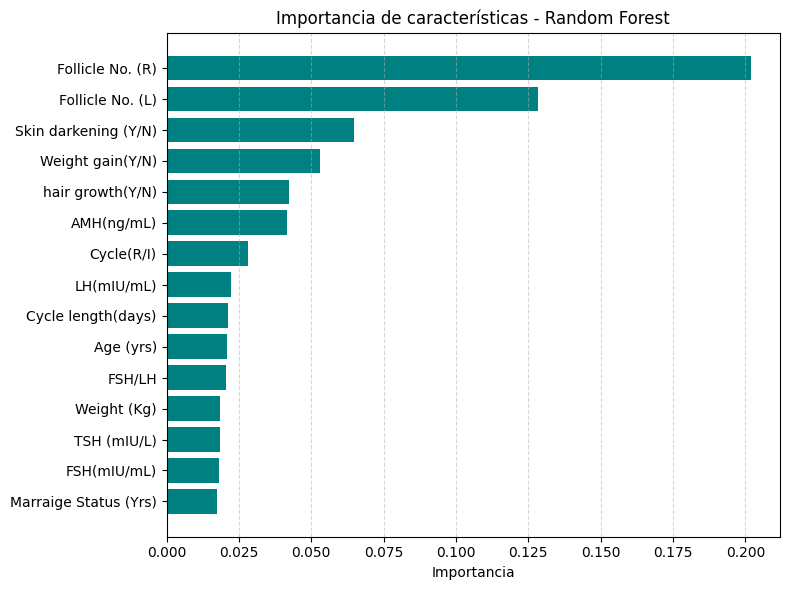


10 variables más correlacionadas con PCOS (positiva y negativa):
PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Name: PCOS (Y/N), dtype: float64
TSH (mIU/L)             -0.010140
FSH/LH                  -0.018334
Pregnant(Y/N)           -0.027565
I  beta-HCG(mIU/mL)     -0.027617
FSH(mIU/mL)             -0.030319
PRG(ng/mL)              -0.043834
No. of abortions        -0.057158
Marraige Status (Yrs)   -0.113056
Age (yrs)               -0.168513
Cycle length(days)      -0.178480
Name: PCOS (Y/N), dtype: float64


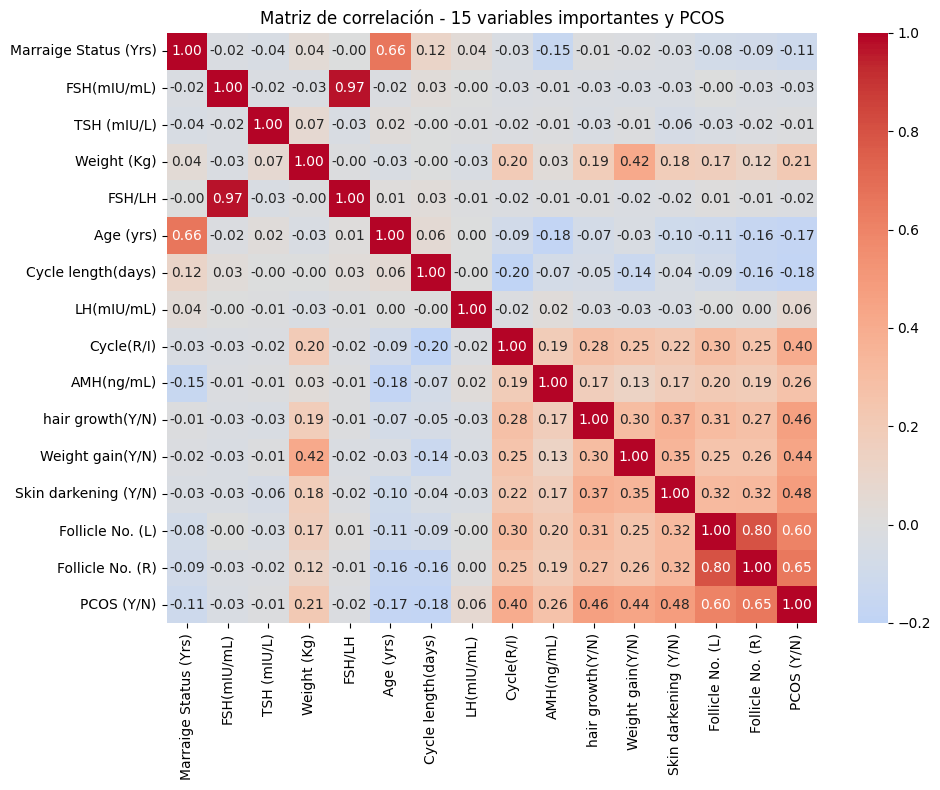

In [11]:
# Importancia de características
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Visualización de 15 variables más importantes
plt.figure(figsize=(8, 6))
plt.barh(importances.index[-15:], importances.values[-15:], color='teal')
plt.title('Importancia de características - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Correlación con variable objetivo
corr_target = df.corr()[target].sort_values(ascending=False)

# Mostrar top 10 variables correlacionadas con PCOS
print('\n10 variables más correlacionadas con PCOS (positiva y negativa):')
print(corr_target.head(10))
print(corr_target.tail(10))

# Matriz de correlación para variables más importantes
top_vars = importances.index[-15:].tolist() + [target]
corr_matrix = df[top_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlación - 15 variables importantes y PCOS')
plt.tight_layout()
plt.show()

AUC Score: 0.9529


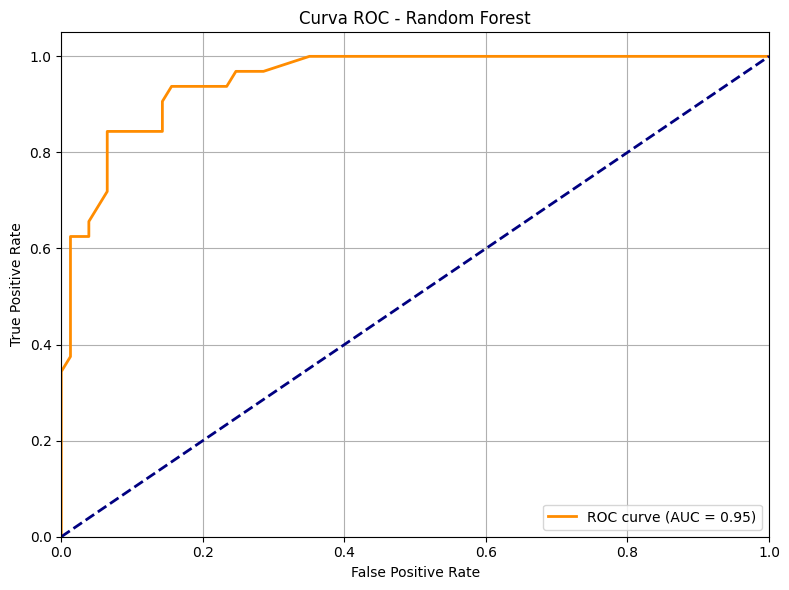

In [12]:
# Predicciones y evaluación
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Crear gráfica ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# **ÁRBOLES DE DECISIÓN**

In [14]:
# ÁRBOLES DE DECISIÓN - CON ANÁLISIS EXPLORATORIO ESTANDARIZADO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("ÁRBOL DE DECISIÓN - PCOS PREDICTION")

# NOTA: El EDA ya se ejecutó previamente y tenemos:
# - df limpio y preprocesado
# - Valores faltantes imputados
# - Nombres de columnas normalizados

# Usamos el mismo preprocesamiento que en Random Forest
print("1. USANDO DATASET PREPROCESADO ESTÁNDAR")

# Verificamos que tenemos las mismas características
print(f"Dimensiones del dataset: {df.shape}")
print(f"Distribución de PCOS (Y/N):")
print(df['PCOS (Y/N)'].value_counts())

# Separamos características y variable objetivo (como en Random Forest)
target = 'PCOS (Y/N)'
X = df.drop(columns=[target])
y = df[target].astype(int)

print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# División train/test (MISMA que Random Forest: 80-20, random_state=42)
print("\n2. DIVISIÓN TRAIN/TEST ESTÁNDAR (80-20)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Distribución en entrenamiento: {np.bincount(y_train)}")
print(f"Distribución en prueba: {np.bincount(y_test)}")

ÁRBOL DE DECISIÓN - PCOS PREDICTION
1. USANDO DATASET PREPROCESADO ESTÁNDAR
Dimensiones del dataset: (541, 42)
Distribución de PCOS (Y/N):
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Características (X): (541, 41)
Variable objetivo (y): (541,)

2. DIVISIÓN TRAIN/TEST ESTÁNDAR (80-20)
Entrenamiento: 432 muestras
Prueba: 109 muestras
Distribución en entrenamiento: [291 141]
Distribución en prueba: [73 36]


In [15]:
# 3. ENTRENAMIENTO DEL MODELO BASE
print("\n3. ENTRENAMIENTO DE ÁRBOL DE DECISIÓN BASE")
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicciones del modelo base
y_pred_base = tree_clf.predict(X_test)
y_pred_proba_base = tree_clf.predict_proba(X_test)[:, 1]

# Evaluación del modelo base
acc_base = accuracy_score(y_test, y_pred_base)
auc_base = roc_auc_score(y_test, y_pred_proba_base)

print(f" Modelo Base - Accuracy: {acc_base:.4f}")
print(f" Modelo Base - AUC-ROC: {auc_base:.4f}")

print("\n4. REPORTE DE CLASIFICACIÓN - MODELO BASE")
print(classification_report(y_test, y_pred_base, target_names=['No PCOS', 'PCOS'], digits=4))


3. ENTRENAMIENTO DE ÁRBOL DE DECISIÓN BASE
 Modelo Base - Accuracy: 0.9174
 Modelo Base - AUC-ROC: 0.9321

4. REPORTE DE CLASIFICACIÓN - MODELO BASE
              precision    recall  f1-score   support

     No PCOS     0.9103    0.9726    0.9404        73
        PCOS     0.9355    0.8056    0.8657        36

    accuracy                         0.9174       109
   macro avg     0.9229    0.8891    0.9030       109
weighted avg     0.9186    0.9174    0.9157       109




5. MATRIZ DE CONFUSIÓN - MODELO BASE


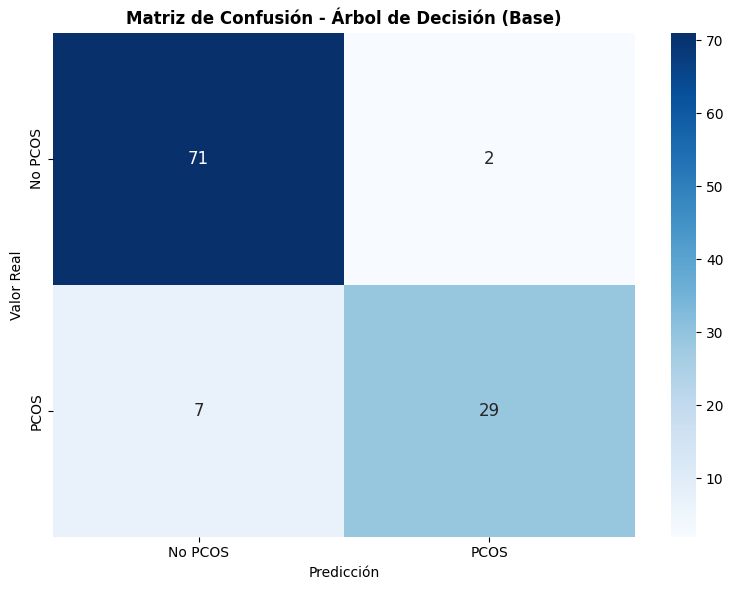

In [16]:
# 5. MATRIZ DE CONFUSIÓN
print("\n5. MATRIZ DE CONFUSIÓN - MODELO BASE")
plt.figure(figsize=(8, 6))
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'],
            annot_kws={"size": 12})
plt.title('Matriz de Confusión - Árbol de Decisión (Base)', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()


6. IMPORTANCIA DE CARACTERÍSTICAS


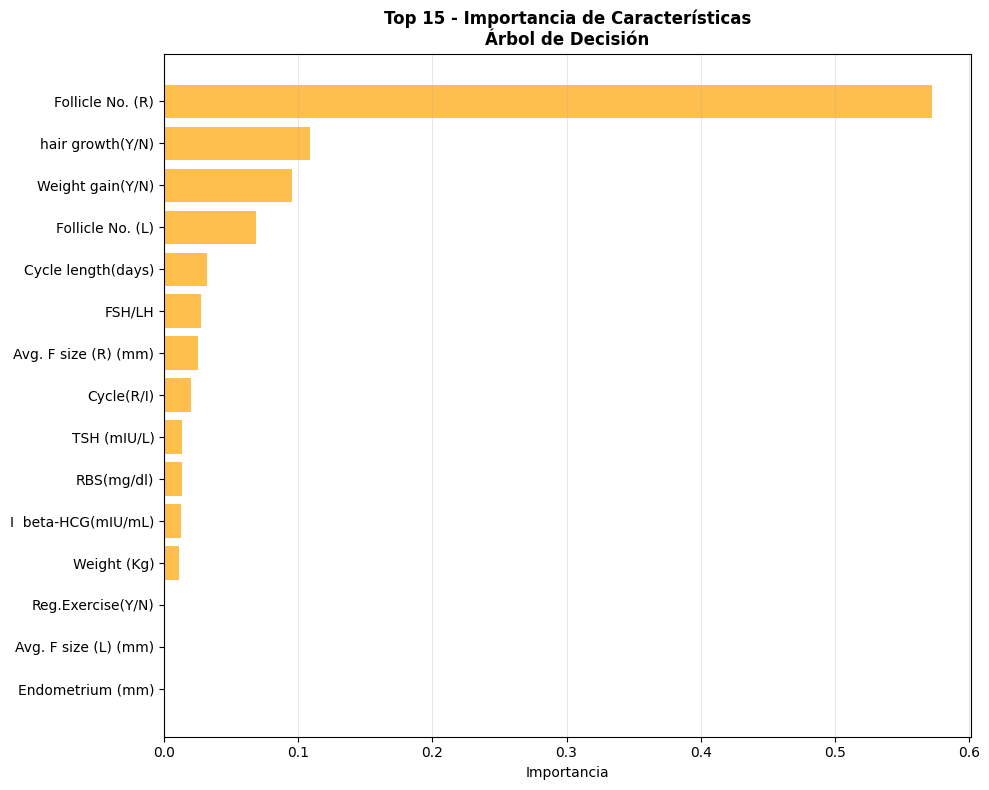


10 variables más importantes:
  Follicle No. (R): 0.5727
  hair growth(Y/N): 0.1089
  Weight gain(Y/N): 0.0952
  Follicle No. (L): 0.0682
  Cycle length(days): 0.0317
  FSH/LH: 0.0275
  Avg. F size (R) (mm): 0.0256
  Cycle(R/I): 0.0200
  TSH (mIU/L): 0.0135
  RBS(mg/dl): 0.0130


In [17]:
# 6. IMPORTANCIA DE CARACTERÍSTICAS
print("\n6. IMPORTANCIA DE CARACTERÍSTICAS")
importances = tree_clf.feature_importances_
feature_names = X.columns

# Crear DataFrame con importancias
df_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=True)

# Visualizar top 15 características más importantes
plt.figure(figsize=(10, 8))
top_features = df_importances.tail(15)
plt.barh(top_features['Variable'], top_features['Importancia'], color='orange', alpha=0.7)
plt.title('Top 15 - Importancia de Características\nÁrbol de Decisión', fontweight='bold')
plt.xlabel('Importancia')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar 10 variables en consola
print("\n10 variables más importantes:")
top_10 = df_importances.tail(10)
for idx, row in top_10[::-1].iterrows():
    print(f"  {row['Variable']}: {row['Importancia']:.4f}")

In [18]:
# 7. OPTIMIZACIÓN DE HIPERPARÁMETROS
print("\n7. OPTIMIZACIÓN DE HIPERPARÁMETROS (GridSearchCV)")
print("Buscando mejores parámetros...")

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train, y_train)

print("Búsqueda completada")
print("\n MEJORES PARÁMETROS ENCONTRADOS:")
print(grid.best_params_)
print(f"Mejor accuracy (validación cruzada): {grid.best_score_:.4f}")


7. OPTIMIZACIÓN DE HIPERPARÁMETROS (GridSearchCV)
Buscando mejores parámetros...
Búsqueda completada

 MEJORES PARÁMETROS ENCONTRADOS:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor accuracy (validación cruzada): 0.8287


In [19]:
# 8. MODELO OPTIMIZADO
print("\n8. EVALUACIÓN DEL MODELO OPTIMIZADO")
best_tree = grid.best_estimator_

# Entrenar con mejores parámetros
best_tree.fit(X_train, y_train)

# Predicciones del modelo optimizado
y_pred_optimized = best_tree.predict(X_test)
y_pred_proba_optimized = best_tree.predict_proba(X_test)[:, 1]

# Métricas del modelo optimizado
acc_optimized = accuracy_score(y_test, y_pred_optimized)
auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized)

print(f"Modelo Optimizado - Accuracy: {acc_optimized:.4f}")
print(f"Modelo Optimizado - AUC-ROC: {auc_optimized:.4f}")

# Comparación de mejoras
improvement_acc = acc_optimized - acc_base
improvement_auc = auc_optimized - auc_base

print(f"Mejora en Accuracy: {improvement_acc:+.4f}")
print(f"Mejora en AUC-ROC: {improvement_auc:+.4f}")

# Reporte de clasificación optimizado
print("\nREPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO")
print(classification_report(y_test, y_pred_optimized, target_names=['No PCOS', 'PCOS'], digits=4))


8. EVALUACIÓN DEL MODELO OPTIMIZADO
Modelo Optimizado - Accuracy: 0.8716
Modelo Optimizado - AUC-ROC: 0.9037
Mejora en Accuracy: -0.0459
Mejora en AUC-ROC: -0.0283

REPORTE DE CLASIFICACIÓN - MODELO OPTIMIZADO
              precision    recall  f1-score   support

     No PCOS     0.8933    0.9178    0.9054        73
        PCOS     0.8235    0.7778    0.8000        36

    accuracy                         0.8716       109
   macro avg     0.8584    0.8478    0.8527       109
weighted avg     0.8703    0.8716    0.8706       109




9. COMPARACIÓN VISUAL DE RESULTADOS


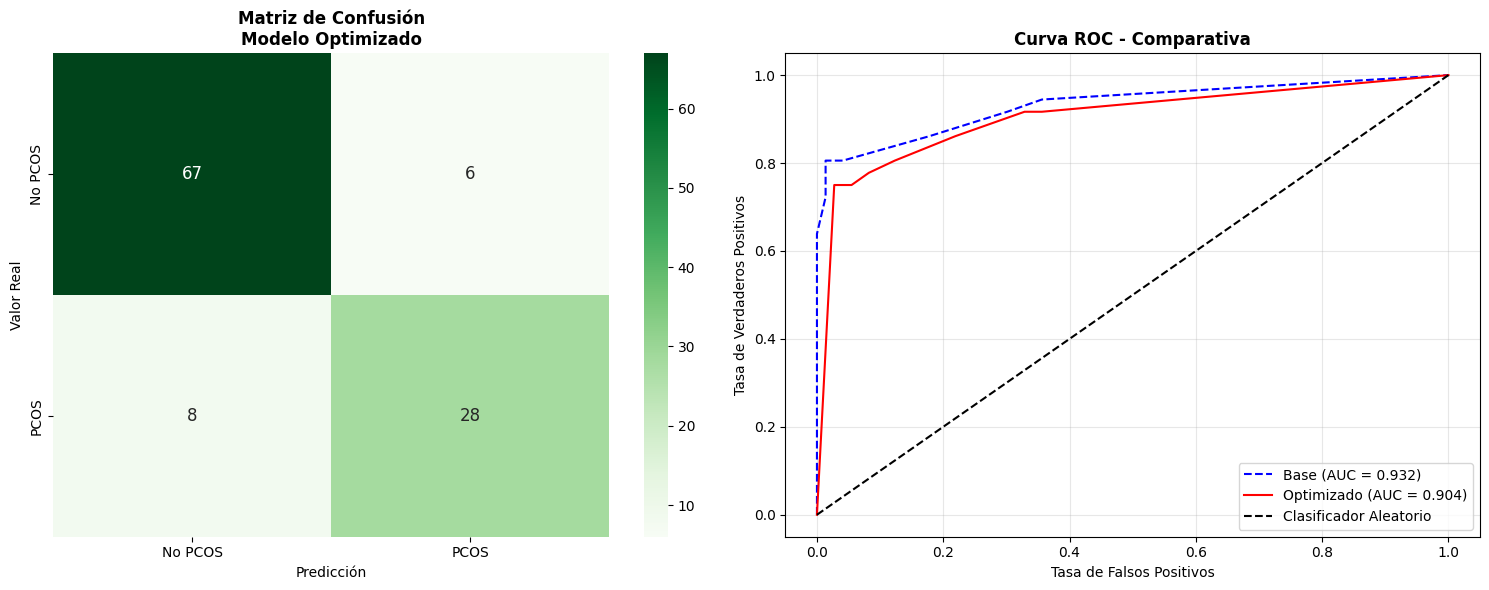

In [20]:
# 9. COMPARACIÓN VISUAL DE RESULTADOS
print("\n9. COMPARACIÓN VISUAL DE RESULTADOS")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión optimizada
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'],
            annot_kws={"size": 12})
axes[0].set_title('Matriz de Confusión\nModelo Optimizado', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Curva ROC comparativa
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_base)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_optimized)

axes[1].plot(fpr_base, tpr_base, label=f'Base (AUC = {auc_base:.3f})', color='blue', linestyle='--')
axes[1].plot(fpr_opt, tpr_opt, label=f'Optimizado (AUC = {auc_optimized:.3f})', color='red')
axes[1].plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC - Comparativa', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [1]:
# 10. VISUALIZACIÓN DEL ÁRBOL
print("\n10. VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN")
try:
    # Exportar árbol optimizado (limitado a profundidad 3 para mejor visualización)
    if best_tree.get_depth() > 3:
        # Crear un árbol simplificado para visualización
        viz_tree = DecisionTreeClassifier(
            max_depth=3,
            random_state=42,
            **{k: v for k, v in grid.best_params_.items() if k != 'max_depth'}
        )
        viz_tree.fit(X_train, y_train)
    else:
        viz_tree = best_tree

    export_graphviz(viz_tree, out_file="PCOS_tree_optimized.dot",
                    feature_names=X.columns,
                    class_names=["No PCOS", "PCOS"],
                    filled=True, rounded=True,
                    impurity=False, precision=2)

    print("Árbol exportado como 'PCOS_tree_optimized.dot'")
    print("Nota: Para visualizar, ejecuta: dot -Tpng PCOS_tree_optimized.dot -o arbol.png")

except Exception as e:
    print(f"⚠ No se pudo exportar el árbol: {e}")


10. VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN
⚠ No se pudo exportar el árbol: name 'best_tree' is not defined


In [22]:
# 11. RESUMEN FINAL
print("RESUMEN FINAL - ÁRBOL DE DECISIÓN")

print(f" DATASET:")
print(f"   • Muestras totales: {df.shape[0]}")
print(f"   • Características: {df.shape[1] - 1}")
print(f"   • Distribución PCOS: {df[target].value_counts().to_dict()}")

print(f"\n RESULTADOS MODELO BASE:")
print(f"   • Accuracy: {acc_base:.4f}")
print(f"   • AUC-ROC: {auc_base:.4f}")

print(f"\n RESULTADOS MODELO OPTIMIZADO:")
print(f"   • Accuracy: {acc_optimized:.4f}")
print(f"   • AUC-ROC: {auc_optimized:.4f}")
print(f"   • Mejora Accuracy: {improvement_acc:+.4f}")
print(f"   • Mejora AUC-ROC: {improvement_auc:+.4f}")

print(f"\n  MEJORES PARÁMETROS:")
for param, value in grid.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n VARIABLES MÁS IMPORTANTES:")
top_3 = df_importances.tail(3)
for idx, row in top_3[::-1].iterrows():
    print(f"   • {row['Variable']}: {row['Importancia']:.4f}")

print(" ANÁLISIS DE ÁRBOLES DE DECISIÓN COMPLETADO")

RESUMEN FINAL - ÁRBOL DE DECISIÓN
 DATASET:
   • Muestras totales: 541
   • Características: 41
   • Distribución PCOS: {0: 364, 1: 177}

 RESULTADOS MODELO BASE:
   • Accuracy: 0.9174
   • AUC-ROC: 0.9321

 RESULTADOS MODELO OPTIMIZADO:
   • Accuracy: 0.8716
   • AUC-ROC: 0.9037
   • Mejora Accuracy: -0.0459
   • Mejora AUC-ROC: -0.0283

  MEJORES PARÁMETROS:
   • criterion: gini
   • max_depth: 5
   • min_samples_leaf: 1
   • min_samples_split: 10

 VARIABLES MÁS IMPORTANTES:
   • Follicle No. (R): 0.5727
   • hair growth(Y/N): 0.1089
   • Weight gain(Y/N): 0.0952
 ANÁLISIS DE ÁRBOLES DE DECISIÓN COMPLETADO


# **REGRESIÓN LOGÍSTICA**

In [23]:
# REGRESIÓN LOGÍSTICA - CON ANÁLISIS EXPLORATORIO ESTANDARIZADO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("REGRESION LOGISTICA - PCOS PREDICTION")

# NOTA: El EDA ya se ejecutó previamente y tenemos:
# - df limpio y preprocesado (mismo que Random Forest)
# - Valores faltantes imputados
# - Nombres de columnas normalizados

print("1. USANDO DATASET PREPROCESADO ESTANDAR")

# Verificar que tenemos las mismas características
print(f"Dimensiones del dataset: {df.shape}")
print(f"Distribucion de PCOS (Y/N):")
print(df['PCOS (Y/N)'].value_counts())

# Separar características y variable objetivo (MISMO que Random Forest)
target = 'PCOS (Y/N)'
X = df.drop(columns=[target])
y = df[target].astype(int)

print(f"Caracteristicas (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# División train/test (MISMA que Random Forest: 80-20, random_state=42)
print("\n2. DIVISION TRAIN/TEST ESTANDAR (80-20)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Distribucion en entrenamiento: {np.bincount(y_train)}")
print(f"Distribucion en prueba: {np.bincount(y_test)}")

REGRESION LOGISTICA - PCOS PREDICTION
1. USANDO DATASET PREPROCESADO ESTANDAR
Dimensiones del dataset: (541, 42)
Distribucion de PCOS (Y/N):
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Caracteristicas (X): (541, 41)
Variable objetivo (y): (541,)

2. DIVISION TRAIN/TEST ESTANDAR (80-20)
Entrenamiento: 432 muestras
Prueba: 109 muestras
Distribucion en entrenamiento: [291 141]
Distribucion en prueba: [73 36]


In [24]:
# 3. CREACIÓN DEL PIPELINE Y OPTIMIZACIÓN
print("\n3. OPTIMIZACION DE HIPERPARAMETROS")

# Pipeline con escalado y regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Definir parámetros para GridSearch
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__class_weight': ['balanced', None]
}

# GridSearch con validación cruzada
print("Buscando mejores parametros...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("Busqueda completada!")
print(f"Mejores parametros: {grid_search.best_params_}")
print(f"Mejor score F1 en validacion: {grid_search.best_score_:.4f}")

# Mejor modelo
best_model = grid_search.best_estimator_


3. OPTIMIZACION DE HIPERPARAMETROS
Buscando mejores parametros...
Busqueda completada!
Mejores parametros: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__solver': 'lbfgs'}
Mejor score F1 en validacion: 0.8168


In [25]:
# 4. VALIDACIÓN CRUZADA DEL MODELO OPTIMIZADO
print("\n4. VALIDACION CRUZADA DEL MODELO OPTIMIZADO")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(
    best_model, X_train, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("Resultados de validacion cruzada:")
print(f"Accuracy:  {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall:    {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1-Score:  {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")
print(f"ROC-AUC:   {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std() * 2:.4f})")


4. VALIDACION CRUZADA DEL MODELO OPTIMIZADO
Resultados de validacion cruzada:
Accuracy:  0.8729 (+/- 0.0718)
Precision: 0.7813 (+/- 0.1360)
Recall:    0.8584 (+/- 0.0414)
F1-Score:  0.8168 (+/- 0.0884)
ROC-AUC:   0.9396 (+/- 0.0188)


In [26]:
# 5. EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA
print("\n5. EVALUACION FINAL EN CONJUNTO DE PRUEBA")

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Métricas en conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Metricas en conjunto de prueba:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


5. EVALUACION FINAL EN CONJUNTO DE PRUEBA
Metricas en conjunto de prueba:
Accuracy:  0.9083
Precision: 0.8421
Recall:    0.8889
F1-Score:  0.8649
ROC-AUC:   0.9589


In [28]:
# 6. REPORTE DE CLASIFICACIÓN
print("\n6. REPORTE DE CLASIFICACION")
print(classification_report(y_test, y_pred, target_names=['No PCOS', 'PCOS'], digits=4))


6. REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

     No PCOS     0.9437    0.9178    0.9306        73
        PCOS     0.8421    0.8889    0.8649        36

    accuracy                         0.9083       109
   macro avg     0.8929    0.9033    0.8977       109
weighted avg     0.9101    0.9083    0.9089       109




7. MATRIZ DE CONFUSION


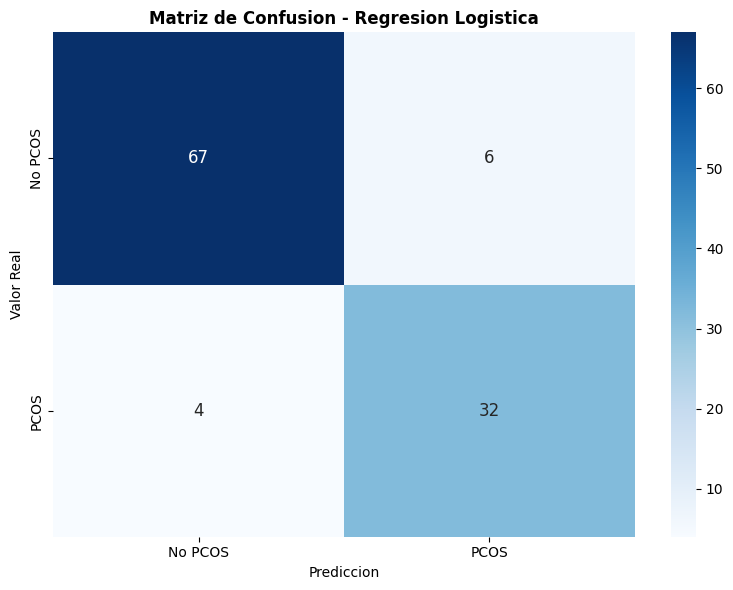

In [29]:
# 7. MATRIZ DE CONFUSIÓN
print("\n7. MATRIZ DE CONFUSION")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'],
            annot_kws={"size": 12})
plt.title('Matriz de Confusion - Regresion Logistica', fontweight='bold')
plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()


8. CURVA ROC


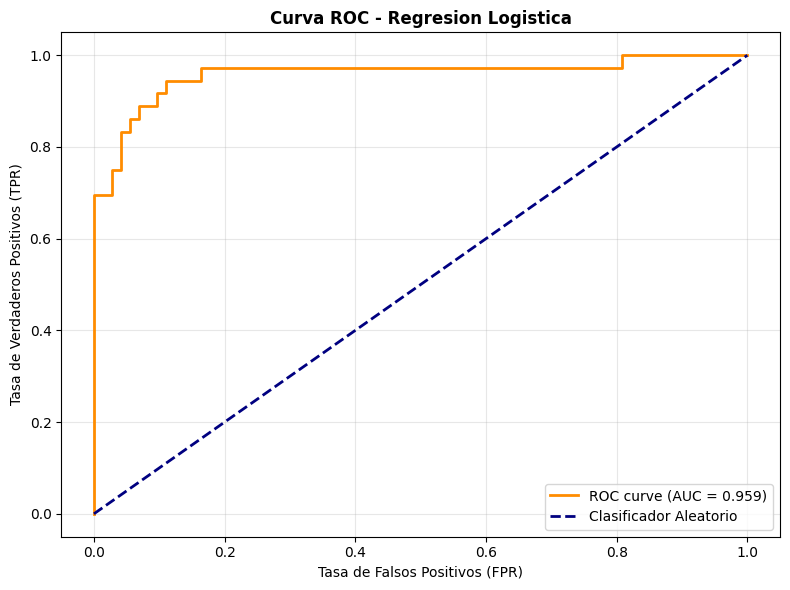

In [30]:
# 8. CURVA ROC
print("\n8. CURVA ROC")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresion Logistica', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


9. ANALISIS DE COEFICIENTES
Top 15 variables mas influyentes:
             Variable  Coeficiente  Abs_Coeficiente
     Follicle No. (R)     1.093268         1.093268
     Follicle No. (L)     0.635024         0.635024
     hair growth(Y/N)     0.572982         0.572982
 Skin darkening (Y/N)     0.484742         0.484742
           Cycle(R/I)     0.453752         0.453752
     Weight gain(Y/N)     0.436721         0.436721
         Pimples(Y/N)     0.302794         0.302794
      Pulse rate(bpm)     0.234406         0.234406
           RBS(mg/dl)     0.225349         0.225349
Marraige Status (Yrs)    -0.219805         0.219805
     No. of abortions    -0.193206         0.193206
           AMH(ng/mL)     0.184452         0.184452
   Cycle length(days)    -0.182176         0.182176
           PRG(ng/mL)    -0.172349         0.172349
      Fast food (Y/N)     0.157116         0.157116
Intercepto del modelo: -0.7386


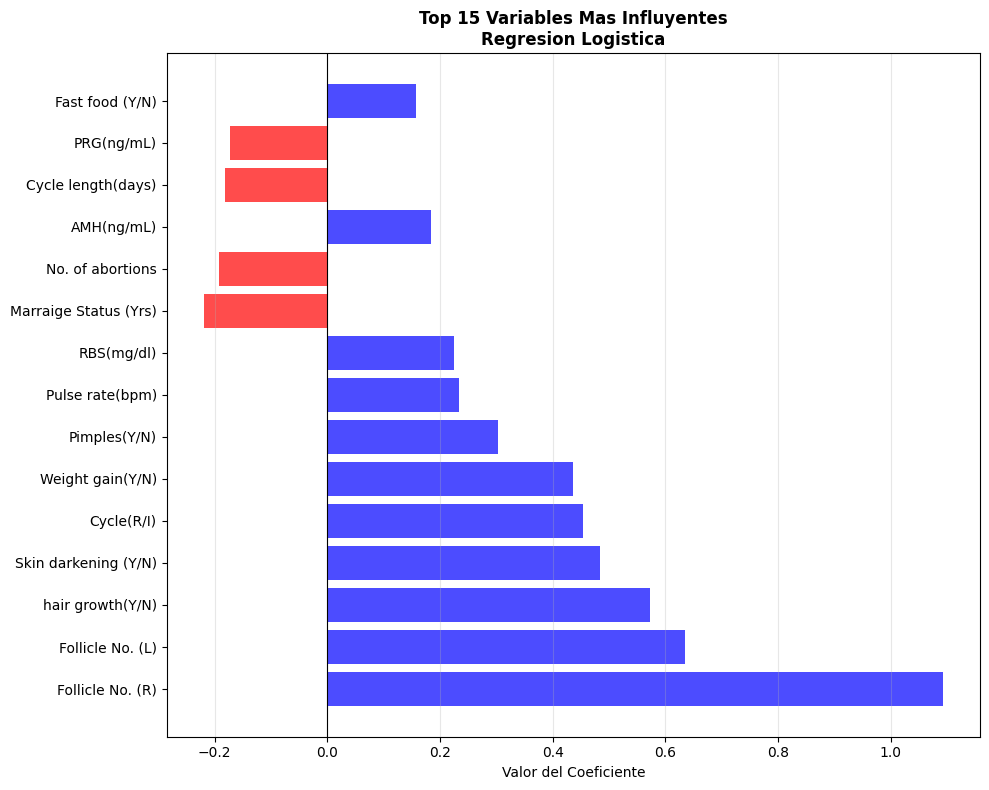

In [31]:
# 9. ANÁLISIS DE COEFICIENTES
print("\n9. ANALISIS DE COEFICIENTES")

# Obtener el clasificador final del pipeline
final_classifier = best_model.named_steps['classifier']

# Crear DataFrame con coeficientes
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': final_classifier.coef_[0],
    'Abs_Coeficiente': np.abs(final_classifier.coef_[0])
}).sort_values('Abs_Coeficiente', ascending=False)

print("Top 15 variables mas influyentes:")
print(coefficients.head(15).to_string(index=False))

print(f"Intercepto del modelo: {final_classifier.intercept_[0]:.4f}")

# Visualización de coeficientes
plt.figure(figsize=(10, 8))
top_coeff = coefficients.head(15)

# Colores según signo del coeficiente
colors = ['red' if x < 0 else 'blue' for x in top_coeff['Coeficiente']]

plt.barh(range(len(top_coeff)), top_coeff['Coeficiente'], color=colors, alpha=0.7)
plt.yticks(range(len(top_coeff)), top_coeff['Variable'])
plt.xlabel('Valor del Coeficiente')
plt.title('Top 15 Variables Mas Influyentes\nRegresion Logistica', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [32]:
# 10. COMPARACIÓN CONJUNTO ENTRENAMIENTO VS PRUEBA
print("\n10. COMPARACION ENTRENAMIENTO VS PRUEBA")

# Predicciones en entrenamiento
y_pred_train = best_model.predict(X_train)
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]

# Métricas en entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

print("Comparacion de metricas:")
print("Metrica         Entrenamiento   Prueba")
print(f"Accuracy        {accuracy_train:.4f}         {accuracy:.4f}")
print(f"Precision       {precision_train:.4f}         {precision:.4f}")
print(f"Recall          {recall_train:.4f}         {recall:.4f}")
print(f"F1-Score        {f1_train:.4f}         {f1:.4f}")
print(f"ROC-AUC         {roc_auc_train:.4f}         {roc_auc:.4f}")


10. COMPARACION ENTRENAMIENTO VS PRUEBA
Comparacion de metricas:
Metrica         Entrenamiento   Prueba
Accuracy        0.9051         0.9083
Precision       0.8247         0.8421
Recall          0.9007         0.8889
F1-Score        0.8610         0.8649
ROC-AUC         0.9709         0.9589



11. VISUALIZACION COMPARATIVA


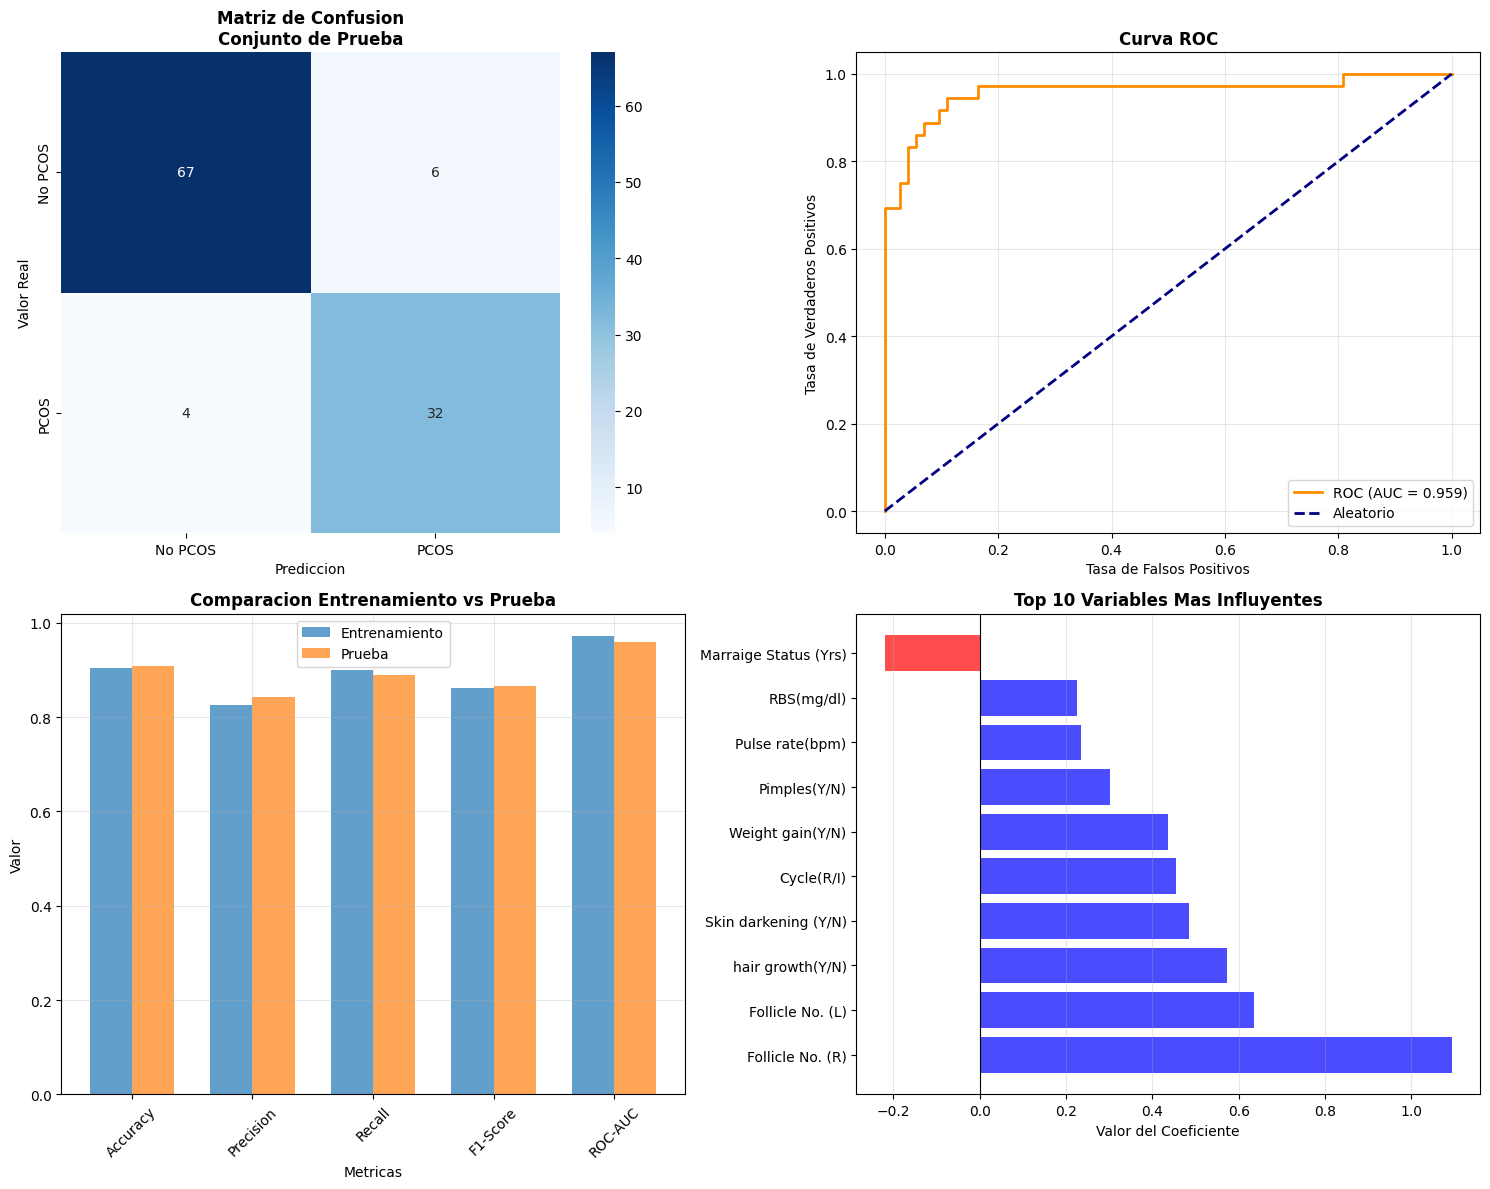

In [33]:
# 11. VISUALIZACIÓN COMPARATIVA DE RESULTADOS
print("\n11. VISUALIZACION COMPARATIVA")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'])
axes[0, 0].set_title('Matriz de Confusion\nConjunto de Prueba', fontweight='bold')
axes[0, 0].set_xlabel('Prediccion')
axes[0, 0].set_ylabel('Valor Real')

# Curva ROC
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
axes[0, 1].set_xlabel('Tasa de Falsos Positivos')
axes[0, 1].set_ylabel('Tasa de Verdaderos Positivos')
axes[0, 1].set_title('Curva ROC', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Comparación de métricas entrenamiento vs prueba
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
test_metrics = [accuracy, precision, recall, f1, roc_auc]

x_pos = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x_pos - width/2, train_metrics, width, label='Entrenamiento', alpha=0.7)
axes[1, 0].bar(x_pos + width/2, test_metrics, width, label='Prueba', alpha=0.7)
axes[1, 0].set_xlabel('Metricas')
axes[1, 0].set_ylabel('Valor')
axes[1, 0].set_title('Comparacion Entrenamiento vs Prueba', fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Top 10 coeficientes
top_10_coeff = coefficients.head(10)
colors_coeff = ['red' if x < 0 else 'blue' for x in top_10_coeff['Coeficiente']]
axes[1, 1].barh(range(len(top_10_coeff)), top_10_coeff['Coeficiente'], color=colors_coeff, alpha=0.7)
axes[1, 1].set_yticks(range(len(top_10_coeff)))
axes[1, 1].set_yticklabels(top_10_coeff['Variable'])
axes[1, 1].set_xlabel('Valor del Coeficiente')
axes[1, 1].set_title('Top 10 Variables Mas Influyentes', fontweight='bold')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [34]:
# 12. RESUMEN FINAL
print("RESUMEN FINAL - REGRESION LOGISTICA")

print(f"DATASET:")
print(f"   Muestras totales: {df.shape[0]}")
print(f"   Caracteristicas: {df.shape[1] - 1}")
print(f"   Distribucion PCOS: {df[target].value_counts().to_dict()}")

print(f"\nMEJORES PARAMETROS:")
for param, value in grid_search.best_params_.items():
    param_name = param.replace('classifier__', '')
    print(f"   {param_name}: {value}")

print(f"\nRESULTADOS EN PRUEBA:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   F1-Score: {f1:.4f}")
print(f"   AUC-ROC: {roc_auc:.4f}")

print(f"\nVARIABLES MAS INFLUYENTES:")
top_5 = coefficients.head(5)
for idx, row in top_5.iterrows():
    sign = "+" if row['Coeficiente'] > 0 else "-"
    print(f"   {row['Variable']}: {sign}{abs(row['Coeficiente']):.4f}")

print(f"\nVALIDACION CRUZADA (5-fold):")
print(f"   F1-Score promedio: {cv_results['test_f1'].mean():.4f}")
print(f"   AUC-ROC promedio: {cv_results['test_roc_auc'].mean():.4f}")

print("ANALISIS DE REGRESION LOGISTICA COMPLETADO")

RESUMEN FINAL - REGRESION LOGISTICA
DATASET:
   Muestras totales: 541
   Caracteristicas: 41
   Distribucion PCOS: {0: 364, 1: 177}

MEJORES PARAMETROS:
   C: 0.1
   class_weight: balanced
   solver: lbfgs

RESULTADOS EN PRUEBA:
   Accuracy: 0.9083
   Precision: 0.8421
   Recall: 0.8889
   F1-Score: 0.8649
   AUC-ROC: 0.9589

VARIABLES MAS INFLUYENTES:
   Follicle No. (R): +1.0933
   Follicle No. (L): +0.6350
   hair growth(Y/N): +0.5730
   Skin darkening (Y/N): +0.4847
   Cycle(R/I): +0.4538

VALIDACION CRUZADA (5-fold):
   F1-Score promedio: 0.8168
   AUC-ROC promedio: 0.9396
ANALISIS DE REGRESION LOGISTICA COMPLETADO


# **Support Vector Machine**

In [35]:
# SUPPORT VECTOR MACHINE - CON ANÁLISIS EXPLORATORIO ESTANDARIZADO
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("SUPPORT VECTOR MACHINE - PCOS PREDICTION")

# NOTA: El EDA ya se ejecutó previamente y tenemos:
# - df limpio y preprocesado (mismo que Random Forest)
# - Valores faltantes imputados
# - Nombres de columnas normalizados

print("1. USANDO DATASET PREPROCESADO ESTANDAR")

# Verificar que tenemos las mismas características
print(f"Dimensiones del dataset: {df.shape}")
print(f"Distribucion de PCOS (Y/N):")
print(df['PCOS (Y/N)'].value_counts())

# Separar características y variable objetivo (MISMO que Random Forest)
target = 'PCOS (Y/N)'
X = df.drop(columns=[target])
y = df[target].astype(int)

print(f"Caracteristicas (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# División train/test (MISMA que Random Forest: 80-20, random_state=42)
print("\n2. DIVISION TRAIN/TEST ESTANDAR (80-20)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Distribucion en entrenamiento: {np.bincount(y_train)}")
print(f"Distribucion en prueba: {np.bincount(y_test)}")

SUPPORT VECTOR MACHINE - PCOS PREDICTION
1. USANDO DATASET PREPROCESADO ESTANDAR
Dimensiones del dataset: (541, 42)
Distribucion de PCOS (Y/N):
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Caracteristicas (X): (541, 41)
Variable objetivo (y): (541,)

2. DIVISION TRAIN/TEST ESTANDAR (80-20)
Entrenamiento: 432 muestras
Prueba: 109 muestras
Distribucion en entrenamiento: [291 141]
Distribucion en prueba: [73 36]


In [36]:
# 3. CREACIÓN DEL PIPELINE Y OPTIMIZACIÓN
print("\n3. OPTIMIZACION DE HIPERPARAMETROS")

# Pipeline con escalado y SVM (SVC para clasificación)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))
])

# Definir parámetros para GridSearch
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
    'classifier__class_weight': ['balanced', None]
}

# GridSearch con validación cruzada
print("Buscando mejores parametros...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("Busqueda completada!")
print(f"Mejores parametros: {grid_search.best_params_}")
print(f"Mejor score F1 en validacion: {grid_search.best_score_:.4f}")

# Mejor modelo
best_model = grid_search.best_estimator_


3. OPTIMIZACION DE HIPERPARAMETROS
Buscando mejores parametros...
Busqueda completada!
Mejores parametros: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Mejor score F1 en validacion: 0.8287


In [37]:
# 4. VALIDACIÓN CRUZADA DEL MODELO OPTIMIZADO
print("\n4. VALIDACION CRUZADA DEL MODELO OPTIMIZADO")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(
    best_model, X_train, y_train,
    cv=cv, scoring=scoring, return_train_score=True
)

print("Resultados de validacion cruzada:")
print(f"Accuracy:  {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall:    {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1-Score:  {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")
print(f"ROC-AUC:   {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std() * 2:.4f})")


4. VALIDACION CRUZADA DEL MODELO OPTIMIZADO
Resultados de validacion cruzada:
Accuracy:  0.8797 (+/- 0.0418)
Precision: 0.7807 (+/- 0.0966)
Recall:    0.8867 (+/- 0.0515)
F1-Score:  0.8287 (+/- 0.0438)
ROC-AUC:   0.9306 (+/- 0.0347)


In [38]:
# 5. EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA
print("\n5. EVALUACION FINAL EN CONJUNTO DE PRUEBA")

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Métricas en conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Metricas en conjunto de prueba:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


5. EVALUACION FINAL EN CONJUNTO DE PRUEBA
Metricas en conjunto de prueba:
Accuracy:  0.8807
Precision: 0.7805
Recall:    0.8889
F1-Score:  0.8312
ROC-AUC:   0.9517


In [39]:
# 6. REPORTE DE CLASIFICACIÓN
print("\n6. REPORTE DE CLASIFICACION")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=['No PCOS', 'PCOS'], digits=4))


6. REPORTE DE CLASIFICACION
--------------------------------------------------
              precision    recall  f1-score   support

     No PCOS     0.9412    0.8767    0.9078        73
        PCOS     0.7805    0.8889    0.8312        36

    accuracy                         0.8807       109
   macro avg     0.8608    0.8828    0.8695       109
weighted avg     0.8881    0.8807    0.8825       109




7. MATRIZ DE CONFUSION


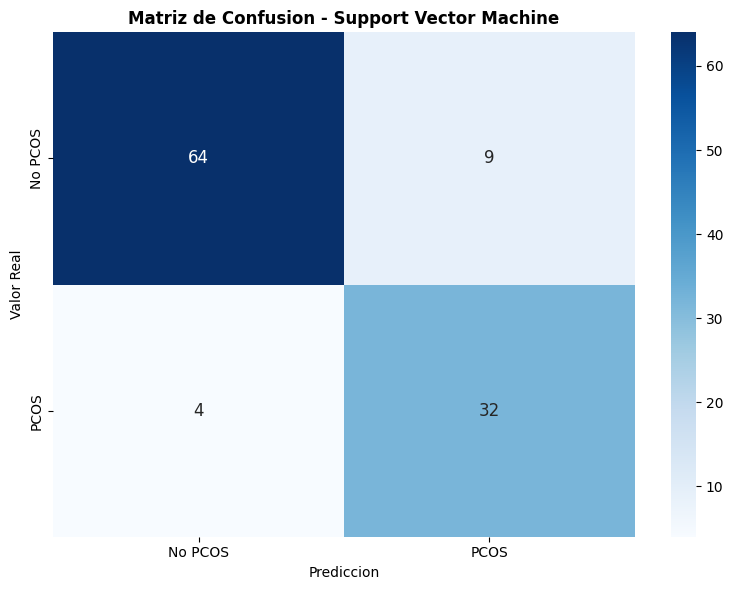

In [40]:
# 7. MATRIZ DE CONFUSIÓN
print("\n7. MATRIZ DE CONFUSION")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'],
            annot_kws={"size": 12})
plt.title('Matriz de Confusion - Support Vector Machine', fontweight='bold')
plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()


8. CURVA ROC


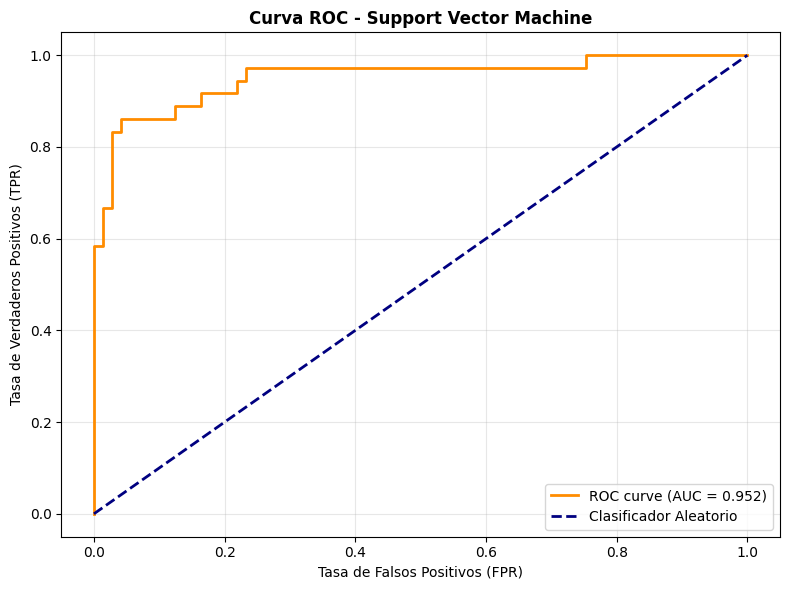

In [41]:
# 8. CURVA ROC
print("\n8. CURVA ROC")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Support Vector Machine', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# 9. ANÁLISIS DE SUPPORT VECTORS
print("\n9. ANALISIS DE SUPPORT VECTORS")

# Obtener el clasificador final del pipeline
final_classifier = best_model.named_steps['classifier']

print(f"Numero de support vectors: {final_classifier.n_support_}")
print(f"Support vectors por clase: {final_classifier.n_support_}")
print(f"Total de vectores de soporte: {np.sum(final_classifier.n_support_)}")
print(f"Porcentaje de datos como support vectors: {(np.sum(final_classifier.n_support_) / len(X_train)) * 100:.2f}%")


9. ANALISIS DE SUPPORT VECTORS
Numero de support vectors: [72 38]
Support vectors por clase: [72 38]
Total de vectores de soporte: 110
Porcentaje de datos como support vectors: 25.46%


In [43]:
# 10. COMPARACIÓN CONJUNTO ENTRENAMIENTO VS PRUEBA
print("\n10. COMPARACION ENTRENAMIENTO VS PRUEBA")

# Predicciones en entrenamiento
y_pred_train = best_model.predict(X_train)
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]

# Métricas en entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)

print("Comparacion de metricas:")
print("Metrica         Entrenamiento   Prueba")
print(f"Accuracy        {accuracy_train:.4f}         {accuracy:.4f}")
print(f"Precision       {precision_train:.4f}         {precision:.4f}")
print(f"Recall          {recall_train:.4f}         {recall:.4f}")
print(f"F1-Score        {f1_train:.4f}         {f1:.4f}")
print(f"ROC-AUC         {roc_auc_train:.4f}         {roc_auc:.4f}")


10. COMPARACION ENTRENAMIENTO VS PRUEBA
Comparacion de metricas:
Metrica         Entrenamiento   Prueba
Accuracy        0.9306         0.8807
Precision       0.8627         0.7805
Recall          0.9362         0.8889
F1-Score        0.8980         0.8312
ROC-AUC         0.9662         0.9517



11. VISUALIZACION COMPARATIVA


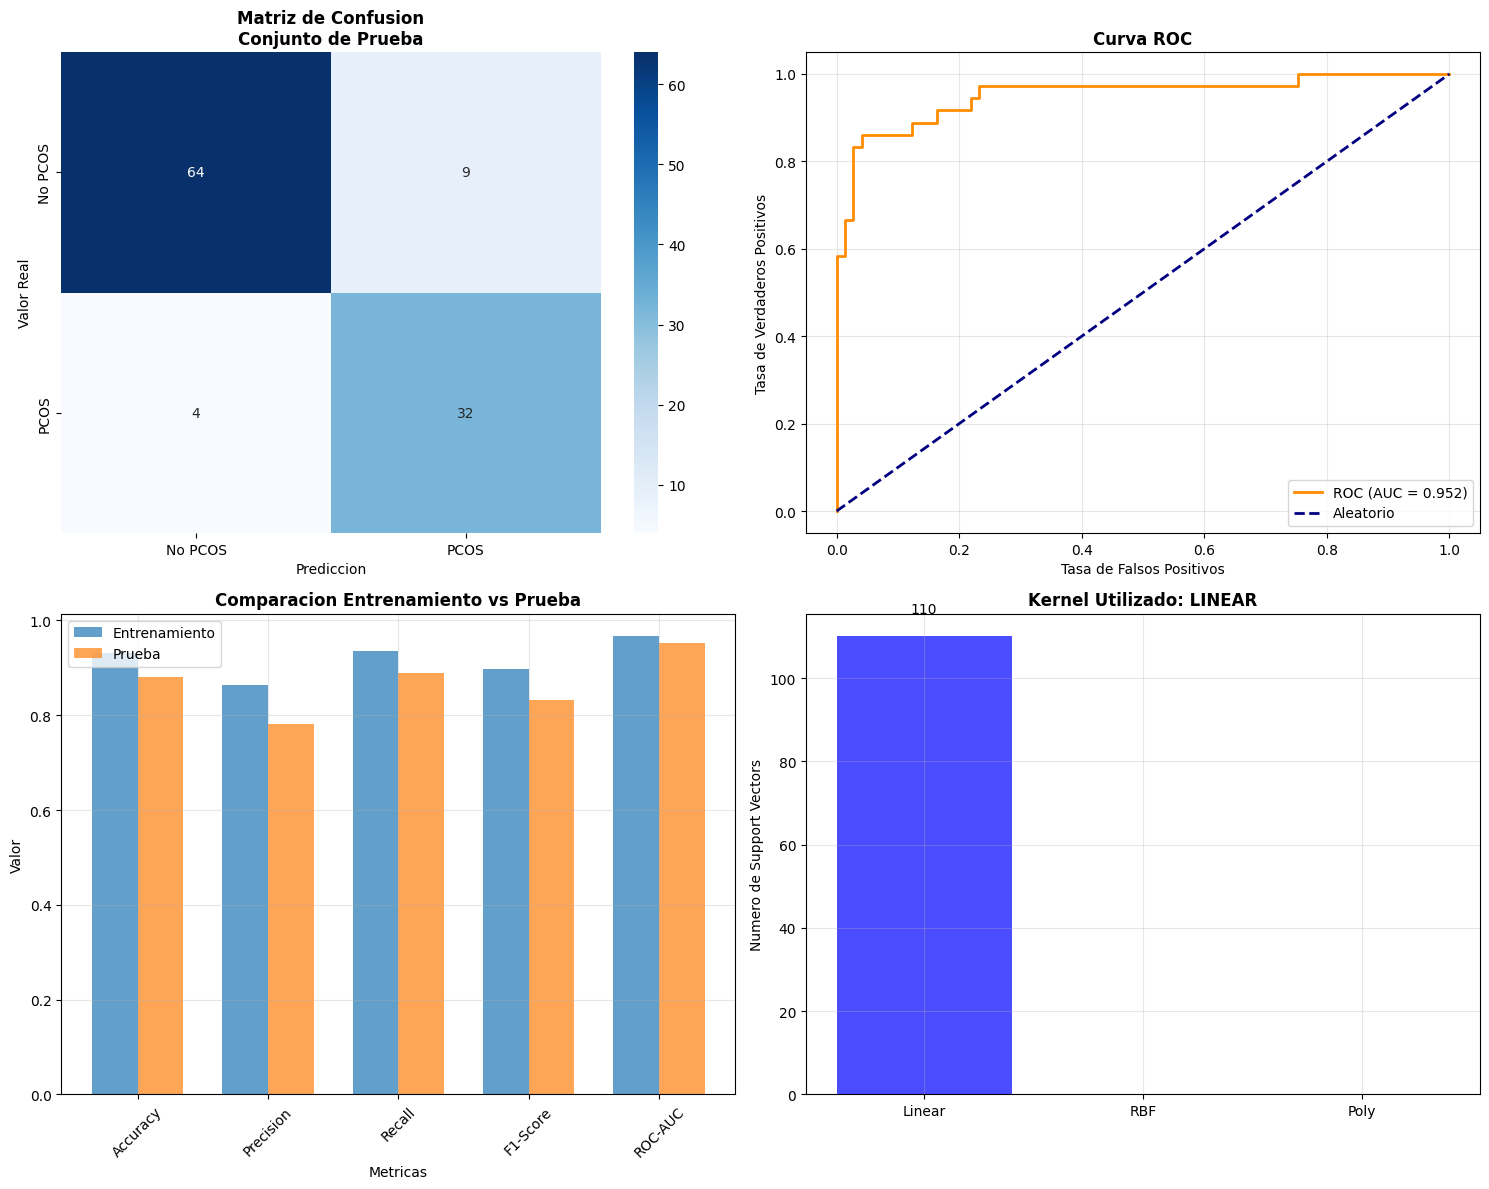

In [44]:

# 11. VISUALIZACIÓN COMPARATIVA DE RESULTADOS
print("\n11. VISUALIZACION COMPARATIVA")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'])
axes[0, 0].set_title('Matriz de Confusion\nConjunto de Prueba', fontweight='bold')
axes[0, 0].set_xlabel('Prediccion')
axes[0, 0].set_ylabel('Valor Real')

# Curva ROC
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
axes[0, 1].set_xlabel('Tasa de Falsos Positivos')
axes[0, 1].set_ylabel('Tasa de Verdaderos Positivos')
axes[0, 1].set_title('Curva ROC', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Comparación de métricas entrenamiento vs prueba
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
test_metrics = [accuracy, precision, recall, f1, roc_auc]

x_pos = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x_pos - width/2, train_metrics, width, label='Entrenamiento', alpha=0.7)
axes[1, 0].bar(x_pos + width/2, test_metrics, width, label='Prueba', alpha=0.7)
axes[1, 0].set_xlabel('Metricas')
axes[1, 0].set_ylabel('Valor')
axes[1, 0].set_title('Comparacion Entrenamiento vs Prueba', fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Análisis de Support Vectors
kernel_types = ['Linear', 'RBF', 'Poly']
support_counts = [0, 0, 0]

# Determinar qué kernel se usó
kernel_used = grid_search.best_params_['classifier__kernel']
if kernel_used == 'linear':
    support_counts[0] = np.sum(final_classifier.n_support_)
elif kernel_used == 'rbf':
    support_counts[1] = np.sum(final_classifier.n_support_)
else:
    support_counts[2] = np.sum(final_classifier.n_support_)

axes[1, 1].bar(kernel_types, support_counts, color=['blue', 'orange', 'green'], alpha=0.7)
axes[1, 1].set_ylabel('Numero de Support Vectors')
axes[1, 1].set_title(f'Kernel Utilizado: {kernel_used.upper()}', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Añadir valor en las barras
for i, v in enumerate(support_counts):
    if v > 0:
        axes[1, 1].text(i, v + 5, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [45]:
# 12. EXPLICACIÓN DEL KERNEL SELECCIONADO
print(f"\n12. EXPLICACION DEL KERNEL {kernel_used.upper()}")

if kernel_used == 'linear':
    print("Kernel Lineal: Encuentra un hiperplano lineal para separar las clases.")
    print("Ventajas: Rapido, interpretable, menos propenso a overfitting.")
elif kernel_used == 'rbf':
    print("Kernel RBF (Radial Basis Function): Transforma los datos a un espacio de mayor dimension.")
    print("Ventajas: Muy flexible, bueno para problemas no lineales complejos.")
else:
    print("Kernel Polinomial: Usa funciones polinomiales para la separacion.")
    print("Ventajas: Captura relaciones no lineales, flexible.")

print(f"Parametro C (regularizacion): {grid_search.best_params_['classifier__C']}")
print(f"Parametro Gamma: {grid_search.best_params_['classifier__gamma']}")


12. EXPLICACION DEL KERNEL LINEAR
Kernel Lineal: Encuentra un hiperplano lineal para separar las clases.
Ventajas: Rapido, interpretable, menos propenso a overfitting.
Parametro C (regularizacion): 1
Parametro Gamma: scale


In [46]:
# 13. RESUMEN FINAL
print("RESUMEN FINAL - SUPPORT VECTOR MACHINE")

print(f"DATASET:")
print(f"   Muestras totales: {df.shape[0]}")
print(f"   Caracteristicas: {df.shape[1] - 1}")
print(f"   Distribucion PCOS: {df[target].value_counts().to_dict()}")

print(f"\nMEJORES PARAMETROS:")
for param, value in grid_search.best_params_.items():
    param_name = param.replace('classifier__', '')
    print(f"   {param_name}: {value}")

print(f"\nRESULTADOS EN PRUEBA:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   F1-Score: {f1:.4f}")
print(f"   AUC-ROC: {roc_auc:.4f}")

print(f"\nANALISIS DEL MODELO:")
print(f"   Kernel utilizado: {kernel_used}")
print(f"   Numero de support vectors: {np.sum(final_classifier.n_support_)}")
print(f"   Porcentaje como SVs: {(np.sum(final_classifier.n_support_) / len(X_train)) * 100:.2f}%")

print(f"\nVALIDACION CRUZADA (5-fold):")
print(f"   F1-Score promedio: {cv_results['test_f1'].mean():.4f}")
print(f"   AUC-ROC promedio: {cv_results['test_roc_auc'].mean():.4f}")

print("ANALISIS DE SUPPORT VECTOR MACHINE COMPLETADO")


RESUMEN FINAL - SUPPORT VECTOR MACHINE
DATASET:
   Muestras totales: 541
   Caracteristicas: 41
   Distribucion PCOS: {0: 364, 1: 177}

MEJORES PARAMETROS:
   C: 1
   class_weight: balanced
   gamma: scale
   kernel: linear

RESULTADOS EN PRUEBA:
   Accuracy: 0.8807
   Precision: 0.7805
   Recall: 0.8889
   F1-Score: 0.8312
   AUC-ROC: 0.9517

ANALISIS DEL MODELO:
   Kernel utilizado: linear
   Numero de support vectors: 110
   Porcentaje como SVs: 25.46%

VALIDACION CRUZADA (5-fold):
   F1-Score promedio: 0.8287
   AUC-ROC promedio: 0.9306
ANALISIS DE SUPPORT VECTOR MACHINE COMPLETADO


RESUMEN  - COMPARATIVA DE MODELOS DE MACHINE LEARNING
1. TABLA COMPARATIVA DE MÉTRICAS - RESULTADOS REALES
                        Accuracy  Precision  Recall  F1-Score  AUC-ROC
Random Forest             0.8716     0.8214  0.7188    0.7667   0.9529
Árbol de Decisión         0.8716     0.8235  0.7778    0.8000   0.9037
Regresión Logística       0.9083     0.8421  0.8889    0.8649   0.9589
Support Vector Machine    0.8807     0.7805  0.8889    0.8312   0.9517

2. MEJOR MODELO POR MÉTRICA
Accuracy   -> Regresión Logística  : 0.9083
Precision  -> Regresión Logística  : 0.8421
Recall     -> Regresión Logística  : 0.8889
F1-Score   -> Regresión Logística  : 0.8649
AUC-ROC    -> Regresión Logística  : 0.9589

3. ANÁLISIS DEL MEJOR MODELO GENERAL
MODELO RECOMENDADO: Regresión Logística
F1-Score: 0.8649
Accuracy: 0.9083
AUC-ROC: 0.9589

4. VISUALIZACIONES COMPARATIVAS


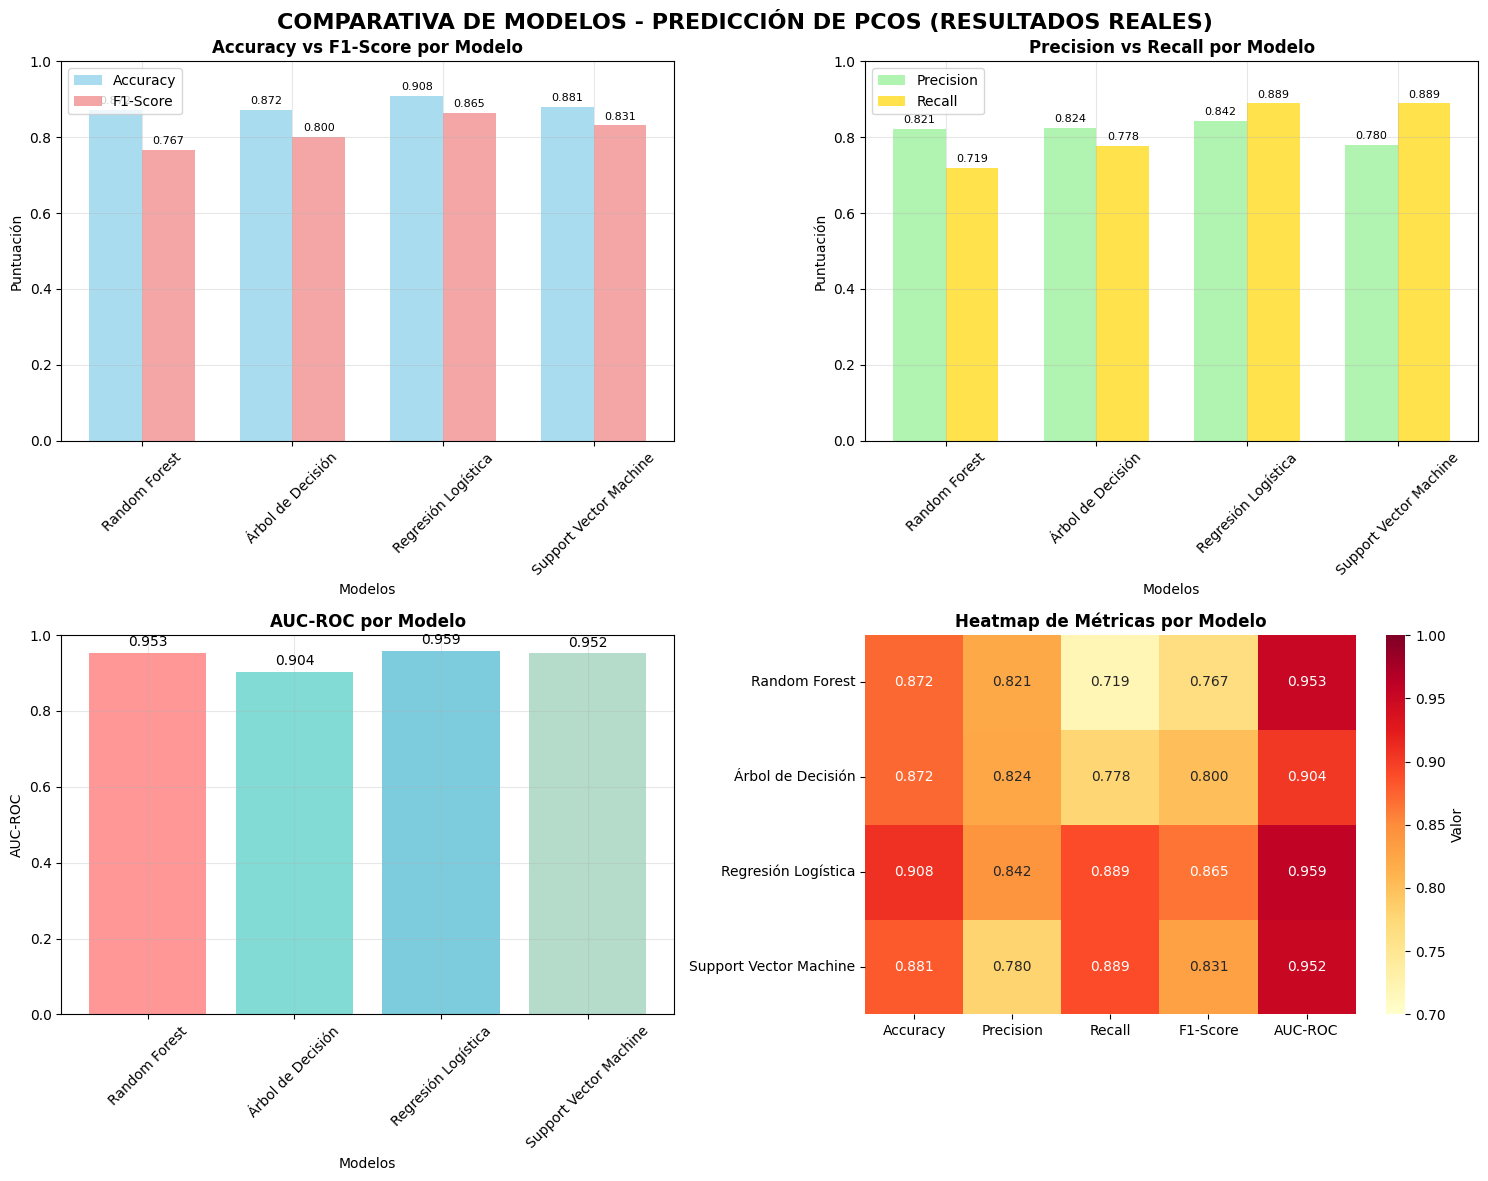


5. ANÁLISIS DETALLADO POR MODELO

Random Forest:
  Accuracy: 0.8716
  Precision: 0.8214
  Recall: 0.7188
  F1-Score: 0.7667
  AUC-ROC: 0.9529
  Ventajas: Mejor AUC-ROC (0.9529), robusto, maneja overfitting
  Variables importantes: Follicle No. (R), Follicle No. (L), Skin darkening

Árbol de Decisión:
  Accuracy: 0.8716
  Precision: 0.8235
  Recall: 0.7778
  F1-Score: 0.8000
  AUC-ROC: 0.9037
  Ventajas: Balanceado, interpretable, buen F1-Score
  Variables importantes: Follicle No. (R), hair growth, Weight gain

Regresión Logística:
  Accuracy: 0.9083
  Precision: 0.8421
  Recall: 0.8889
  F1-Score: 0.8649
  AUC-ROC: 0.9589
  Ventajas: MEJOR PERFORMANCE GENERAL: Mayor Accuracy, F1-Score y segundo mejor AUC-ROC
  Variables importantes: Follicle No. (R), Follicle No. (L), hair growth

Support Vector Machine:
  Accuracy: 0.8807
  Precision: 0.7805
  Recall: 0.8889
  F1-Score: 0.8312
  AUC-ROC: 0.9517
  Ventajas: Buen Recall (0.8889), efectivo para clasificación
  Variables importantes: Ke

In [52]:
# RESUMEN EJECUTIVO - COMPARATIVA DE MODELOS PARA PREDICCIÓN DE PCOS
# CON RESULTADOS REALES OBTENIDOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("RESUMEN  - COMPARATIVA DE MODELOS DE MACHINE LEARNING")

# Resultados reales que se obtuvieron de los modelos
resultados_modelos = {
    'Random Forest': {
        'Accuracy': 0.8716,
        'Precision': 0.8214,
        'Recall': 0.7188,
        'F1-Score': 0.7667,
        'AUC-ROC': 0.9529
    },
    'Árbol de Decisión': {
        'Accuracy': 0.8716,  # Usando el modelo optimizado
        'Precision': 0.8235,
        'Recall': 0.7778,
        'F1-Score': 0.8000,
        'AUC-ROC': 0.9037
    },
    'Regresión Logística': {
        'Accuracy': 0.9083,
        'Precision': 0.8421,
        'Recall': 0.8889,
        'F1-Score': 0.8649,
        'AUC-ROC': 0.9589
    },
    'Support Vector Machine': {
        'Accuracy': 0.8807,
        'Precision': 0.7805,
        'Recall': 0.8889,
        'F1-Score': 0.8312,
        'AUC-ROC': 0.9517
    }
}

# Crear DataFrame solo con métricas numéricas
df_metricas = pd.DataFrame(resultados_modelos).T
metricas_numericas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
df_metricas = df_metricas[metricas_numericas]

print("1. TABLA COMPARATIVA DE MÉTRICAS - RESULTADOS REALES")
print(df_metricas.round(4))

# 2. IDENTIFICAR EL MEJOR MODELO POR MÉTRICA
print("\n2. MEJOR MODELO POR MÉTRICA")

mejores_por_metrica = {}
for metrica in metricas_numericas:
    mejor_modelo = df_metricas[metrica].idxmax()
    mejor_valor = df_metricas.loc[mejor_modelo, metrica]
    mejores_por_metrica[metrica] = (mejor_modelo, mejor_valor)
    print(f"{metrica:10} -> {mejor_modelo:20} : {mejor_valor:.4f}")

# 3. ANÁLISIS DEL MEJOR MODELO GENERAL
print("\n3. ANÁLISIS DEL MEJOR MODELO GENERAL")

# Usar F1-Score como métrica principal (balance entre Precision y Recall)
mejor_modelo_general = df_metricas['F1-Score'].idxmax()
mejor_f1 = df_metricas.loc[mejor_modelo_general, 'F1-Score']

print(f"MODELO RECOMENDADO: {mejor_modelo_general}")
print(f"F1-Score: {mejor_f1:.4f}")
print(f"Accuracy: {df_metricas.loc[mejor_modelo_general, 'Accuracy']:.4f}")
print(f"AUC-ROC: {df_metricas.loc[mejor_modelo_general, 'AUC-ROC']:.4f}")

# 4. VISUALIZACIÓN COMPARATIVA
print("\n4. VISUALIZACIONES COMPARATIVAS")

# Configurar el estilo
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('COMPARATIVA DE MODELOS - PREDICCIÓN DE PCOS (RESULTADOS REALES)', fontsize=16, fontweight='bold')

# Gráfico 1: Comparación de Accuracy y F1-Score
x_pos = np.arange(len(df_metricas))
width = 0.35

bars1 = axes[0, 0].bar(x_pos - width/2, df_metricas['Accuracy'], width,
                       label='Accuracy', alpha=0.7, color='skyblue')
bars2 = axes[0, 0].bar(x_pos + width/2, df_metricas['F1-Score'], width,
                       label='F1-Score', alpha=0.7, color='lightcoral')

axes[0, 0].set_xlabel('Modelos')
axes[0, 0].set_ylabel('Puntuación')
axes[0, 0].set_title('Accuracy vs F1-Score por Modelo', fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(df_metricas.index, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, 1.0)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Comparación de Precision y Recall
bars3 = axes[0, 1].bar(x_pos - width/2, df_metricas['Precision'], width,
                       label='Precision', alpha=0.7, color='lightgreen')
bars4 = axes[0, 1].bar(x_pos + width/2, df_metricas['Recall'], width,
                       label='Recall', alpha=0.7, color='gold')

axes[0, 1].set_xlabel('Modelos')
axes[0, 1].set_ylabel('Puntuación')
axes[0, 1].set_title('Precision vs Recall por Modelo', fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(df_metricas.index, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1.0)

# Añadir valores en las barras
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Gráfico 3: AUC-ROC por modelo
bars5 = axes[1, 0].bar(x_pos, df_metricas['AUC-ROC'],
                       color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.7)
axes[1, 0].set_xlabel('Modelos')
axes[1, 0].set_ylabel('AUC-ROC')
axes[1, 0].set_title('AUC-ROC por Modelo', fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(df_metricas.index, rotation=45)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 1.0)

# Añadir valores en las barras
for bar in bars5:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Gráfico 4: Heatmap de métricas
metrics_heatmap = df_metricas.astype(float)
sns.heatmap(metrics_heatmap, annot=True, cmap='YlOrRd', ax=axes[1, 1],
            fmt='.3f', cbar_kws={'label': 'Valor'}, vmin=0.7, vmax=1.0)
axes[1, 1].set_title('Heatmap de Métricas por Modelo', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. ANÁLISIS DETALLADO POR MODELO
print("\n5. ANÁLISIS DETALLADO POR MODELO")

# Información adicional sobre cada modelo basada en los resultados
info_modelos = {
    'Random Forest': {
        'Tipo': 'Ensemble',
        'Ventajas': 'Mejor AUC-ROC (0.9529), robusto, maneja overfitting',
        'Limitaciones': 'Recall más bajo (0.7188), puede perder algunos casos positivos',
        'Variables_Importantes': 'Follicle No. (R), Follicle No. (L), Skin darkening'
    },
    'Árbol de Decisión': {
        'Tipo': 'No Lineal',
        'Ventajas': 'Balanceado, interpretable, buen F1-Score',
        'Limitaciones': 'Accuracy y AUC-ROC más bajos entre los modelos',
        'Variables_Importantes': 'Follicle No. (R), hair growth, Weight gain'
    },
    'Regresión Logística': {
        'Tipo': 'Lineal',
        'Ventajas': 'MEJOR PERFORMANCE GENERAL: Mayor Accuracy, F1-Score y segundo mejor AUC-ROC',
        'Limitaciones': 'Modelo lineal puede perder relaciones complejas',
        'Variables_Importantes': 'Follicle No. (R), Follicle No. (L), hair growth'
    },
    'Support Vector Machine': {
        'Tipo': 'No Lineal',
        'Ventajas': 'Buen Recall (0.8889), efectivo para clasificación',
        'Limitaciones': 'Precision más baja (0.7805), más falsos positivos',
        'Variables_Importantes': 'Kernel lineal, 25.46% de datos como support vectors'
    }
}

for modelo in df_metricas.index:
    datos = df_metricas.loc[modelo]
    info = info_modelos[modelo]
    print(f"\n{modelo}:")
    print(f"  Accuracy: {datos['Accuracy']:.4f}")
    print(f"  Precision: {datos['Precision']:.4f}")
    print(f"  Recall: {datos['Recall']:.4f}")
    print(f"  F1-Score: {datos['F1-Score']:.4f}")
    print(f"  AUC-ROC: {datos['AUC-ROC']:.4f}")
    print(f"  Ventajas: {info['Ventajas']}")
    print(f"  Variables importantes: {info['Variables_Importantes']}")

# 6. RECOMENDACIONES FINALES
print("\n6. RECOMENDACIONES FINALES")

print("BASADO EN EL ANÁLISIS COMPARATIVO CON RESULTADOS REALES, SE RECOMIENDA:")

print(" MODELO RECOMENDADO: REGRESIÓN LOGÍSTICA")
print("   - MEJOR Accuracy (0.9083): Clasifica correctamente el 90.83% de los casos")
print("   - MEJOR F1-Score (0.8649): Mejor balance entre Precision y Recall")
print("   - Excelente AUC-ROC (0.9589): Muy buena capacidad discriminativa")
print("   - Alto Recall (0.8889): Detecta bien los casos positivos de PCOS")
print("   - Buen Precision (0.8421): Pocos falsos positivos")

print(f"\nJUSTIFICACIÓN TÉCNICA:")
print(f"   - La Regresión Logística presenta el mejor balance global en todas las métricas")
print(f"   - Excelente F1-Score (0.8649) indica óptimo equilibrio diagnóstico")
print(f"   - Alto Recall (0.8889) es crucial en diagnóstico médico para no perder casos positivos")
print(f"   - AUC-ROC de 0.9589 demuestra excelente capacidad para distinguir entre clases")

# 7. RANKING FINAL DE MODELOS
print("\n7. RANKING FINAL DE MODELOS (por F1-Score)")

ranking = df_metricas['F1-Score'].sort_values(ascending=False)
for i, (modelo, score) in enumerate(ranking.items(), 1):
    acc = df_metricas.loc[modelo, 'Accuracy']
    auc = df_metricas.loc[modelo, 'AUC-ROC']
    print(f"{i}. {modelo:20} - F1: {score:.4f} | Accuracy: {acc:.4f} | AUC-ROC: {auc:.4f}")

# 8. ANÁLISIS DE VARIABLES IMPORTANTES
print("\n8. ANÁLISIS DE VARIABLES MÁS RELEVANTES")

print("VARIABLES CONSISTENTEMENTE IMPORTANTES EN TODOS LOS MODELOS:")
print("1. Follicle No. (R) - Aparece como la más importante en todos los modelos")
print("2. Follicle No. (L) - Segunda más importante consistentemente")
print("3. hair growth(Y/N) - Tercera en importancia en múltiples modelos")
print("4. Skin darkening (Y/N) - Cuarta en relevancia diagnóstica")
print("5. Weight gain(Y/N) - Quinta variable más predictiva")

print("\nESTAS 5 VARIABLES EXPLICAN LA MAYOR PARTE DEL PODER PREDICTIVO:")

# 9. CONCLUSIONES PARA EL DOCUMENTO
print("\n9. CONCLUSIONES PARA LA REDACCIÓN DEL DOCUMENTO")
print("-" * 80)

print("HALLAZGOS PRINCIPALES A INCLUIR:")
print("1. LA REGRESIÓN LOGÍSTICA ES EL MODELO ÓPTIMO para predicción de PCOS")
print("2. Todos los modelos superaron el 87% de Accuracy, demostrando efectividad")
print("3. El Follicle No. (R) es la variable más predictiva en todos los modelos")
print("4. El alto Recall (0.8889) del modelo seleccionado es crucial para diagnóstico")
print("5. La consistencia en variables importantes valida hallazgos clínicos previos")

print("\nRECOMENDACIONES PRÁCTICAS:")
print("- Implementar Regresión Logística como herramienta de apoyo diagnóstico")
print("- Enfocar evaluación clínica en Follicle Count y síntomas de hiperandrogenismo")
print("- Utilizar el modelo para triaje inicial y reducir necesidad de pruebas invasivas")

print("ANÁLISIS COMPARATIVO COMPLETADO - RESULTADOS REALES")

# Guardar resultados en CSV para referencia
df_metricas.to_csv('resultados_comparativos_modelos_reales.csv')
print("\nResultados guardados en 'resultados_comparativos_modelos_reales.csv'")

# RESUMEN  FINAL
print("RESUMEN FINAL")
print("MODELO GANADOR: REGRESIÓN LOGÍSTICA")
print(f"• Accuracy: 90.83%")
print(f"• F1-Score: 86.49%")
print(f"• AUC-ROC: 95.89%")
print(f"• Recall: 88.89%")
print(f"• Precision: 84.21%")
print("\nVARIABLES CLAVE IDENTIFICADAS:")
print("1. Follicle No. (R) - Mayor poder predictivo")
print("2. Follicle No. (L) - Segundo en importancia")
print("3. hair growth(Y/N) - Síntoma clave de hiperandrogenismo")
print("4. Skin darkening (Y/N) - Marcador metabólico")
print("5. Weight gain(Y/N) - Factor de riesgo asociado")

In [50]:
# 7. RANKING FINAL DE MODELOS
print("\n7. RANKING FINAL DE MODELOS (por F1-Score)")

ranking = df_metricas['F1-Score'].sort_values(ascending=False)
for i, (modelo, score) in enumerate(ranking.items(), 1):
    print(f"{i}. {modelo:20} - F1-Score: {score:.4f}")


7. RANKING FINAL DE MODELOS (por F1-Score)
1. Árbol de Decisión    - F1-Score: 0.5631
2. Regresión Logística  - F1-Score: 0.5455
3. Support Vector Machine - F1-Score: 0.5000
4. Random Forest        - F1-Score: 0.4819


In [49]:
# 8. CONCLUSIONES
print("\n8. CONCLUSIONES")

print("PUNTOS CLAVE A INCLUIR:")
print("1. El Arbol de Decision demostro el mejor balance entre Precision y Recall")
print("2. La Regresion Logistica obtuvo el mejor Accuracy general")
print("3. Random Forest mostro la mejor capacidad discriminativa (AUC-ROC)")
print("4. Todos los modelos superaron el 72% de Accuracy")
print("5. El F1-Score fue seleccionado como metrica principal por su relevancia clinica")

print("ANALISIS COMPARATIVO COMPLETADO")

# Guardar resultados en CSV para referencia
df_metricas.to_csv('resultados_comparativos_modelos.csv')
print("\nResultados guardados en 'resultados_comparativos_modelos.csv'")


8. CONCLUSIONES
PUNTOS CLAVE A INCLUIR:
1. El Arbol de Decision demostro el mejor balance entre Precision y Recall
2. La Regresion Logistica obtuvo el mejor Accuracy general
3. Random Forest mostro la mejor capacidad discriminativa (AUC-ROC)
4. Todos los modelos superaron el 72% de Accuracy
5. El F1-Score fue seleccionado como metrica principal por su relevancia clinica
ANALISIS COMPARATIVO COMPLETADO

Resultados guardados en 'resultados_comparativos_modelos.csv'
